<a href="https://colab.research.google.com/github/Arden-Zhu/fashion_net2/blob/master/DeepFashion_classifer_by_category_picked.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! nvidia-smi

Wed Jan  8 16:47:18 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


import os
import time
import pandas as pd
import numpy as np
import PIL
from pathlib import Path

In [3]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
my_drive_dir = "/content/gdrive/My Drive/Machine Learning"

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
since = time.time()
dataset_root = os.path.join(my_drive_dir, 'Datasets\DeepFashion\Category and Attribute Prediction Benchmark'.replace('\\', '/'))
! tar xf "{dataset_root}/selected_products.tar" -C data/
print('%.3f' % (time.time() - since))

51.849


In [0]:
file = os.path.join(dataset_root, 'selected_products.csv')
df = pd.read_csv(file, index_col=0)
df = df.loc[:, ['file', 'category_name', 'category_id']]
df['file'] = df.apply(lambda m: m.file[4:], axis=1)

In [0]:
def create_learner(bs:int, data_path:str, df, learner_path:str, model_dir:str, pretrained:bool):
  transforms =  get_transforms(max_zoom=1.05, max_warp=0.05, max_rotate=5)
  transforms[0][0] = crop_pad(row_pct=(0.4, 0.6), col_pct=(0.4, 0.6))
  
  data = ImageDataBunch.from_df(data_path, df, size=224, bs=bs, ds_tfms=transforms
                              ).normalize(imagenet_stats)

  learn = cnn_learner(data, models.resnet34, metrics=error_rate, path=learner_path, model_dir=model_dir, pretrained=pretrained)
  return learn

In [0]:
create_learner2 = partial(create_learner, data_path = 'data/data/selected_products', df = df, learner_path = my_drive_dir + '/Fashionnet', model_dir = 'Classifer_picked/')

## load small picked dat

In [0]:
since = time.time()
dataset_root = os.path.join(my_drive_dir, 'Datasets\DeepFashion\Category and Attribute Prediction Benchmark'.replace('\\', '/'))
! tar xf "{dataset_root}/picked.tar" -C data/
print('%.3f' % (time.time() - since))

6.690


## list_category_img

In [0]:
file = os.path.join(dataset_root, 'picked.csv')
df = pd.read_csv(file, index_col=0)
df = df.loc[:, ['file', 'category_name', 'category_id']]
df['file'] = df.apply(lambda m: m.file[4:], axis=1)
df.head()

,file,category_name,category_id
23063,Kimono-Sleeved_Paisley_Blouse/img_00000121.jpg,Blouse,3
30780,Boxy_Chiffon_Pocket_Blouse/img_00000056.jpg,Blouse,3
13998,Crochet_Lace-Paneled_Blouse/img_00000035.jpg,Blouse,3
123023,New_York_City_Pocket_Tee/img_00000012.jpg,Tee,18
21889,Georgette_Tulip_Back_Blouse/img_00000029.jpg,Blouse,3


## ImageDataBunch

In [0]:
bs = 64

In [0]:
transforms =  get_transforms(max_zoom=1.05, max_warp=0.05, max_rotate=5)
transforms[0][0] = crop_pad(row_pct=(0.4, 0.6), col_pct=(0.4, 0.6))
# tfs = (tfs[0][1:], tfs[1])
transforms

([RandTransform(tfm=TfmCrop (crop_pad), kwargs={'row_pct': (0.4, 0.6), 'col_pct': (0.4, 0.6)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (flip_lr), kwargs={}, p=0.5, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.05, 0.05)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-5, 5)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.05), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.4, 0.6)}, p=0.75, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.8, 1.25)}, p=0.75, resolved={}, do_run=True, is_random=True

In [0]:
data = ImageDataBunch.from_df('data/data/picked', df, size=224, bs=bs, ds_tfms=transforms
                              ).normalize(imagenet_stats)

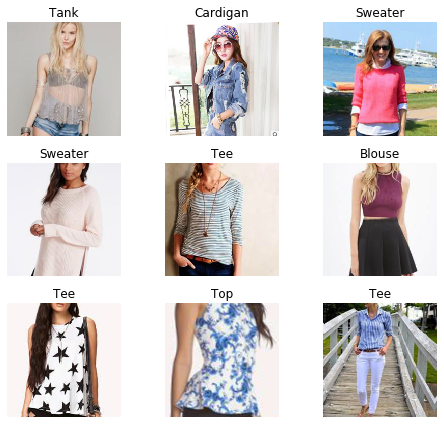

In [0]:
data.show_batch(rows=3, figsize=(7,6))

## Training: resnet34

In [0]:
learn_root = my_drive_dir + '/Fashionnet'
learn = cnn_learner(data, models.resnet34, metrics=error_rate, path=learn_root, model_dir='Classifer_picked/', pretrained=True)

In [0]:
stage = 1
learn.fit_one_cycle(2)
learn.save('stage-' + str(stage))
# ! cp models/stage-{stage}.pth '{model_save_path}/'

epoch,train_loss,valid_loss,error_rate,time
0,1.531042,1.395575,0.483750,04:54
1,1.361895,1.300883,0.444500,04:57


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


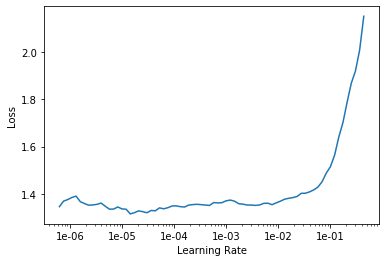

In [0]:
learn.lr_find()
learn.recorder.plot()

In [0]:
stage += 1
learn.fit_one_cycle(4, max_lr=1e-5)
s_stage = 'stage-%d' % stage
learn.save(s_stage)
print(s_stage)

epoch,train_loss,valid_loss,error_rate,time
0,1.314096,1.299095,0.444250,05:00
1,1.322662,1.294497,0.443125,04:51
2,1.308831,1.291478,0.441000,04:48
3,1.315611,1.292201,0.440625,04:44


In [0]:
'stage-%d' % stage

'stage-2'

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


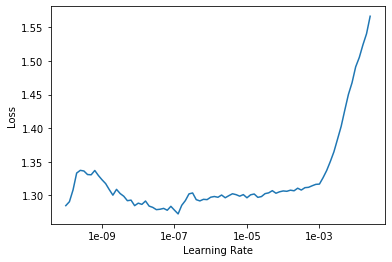

In [0]:
learn.unfreeze()
learn.lr_find(start_lr=1e-11, end_lr=1e-1)
learn.recorder.plot()

In [0]:
learn.load('stage-2')
learn.unfreeze()
for i in range(2):
  learn.fit_one_cycle(2, max_lr=9e-8)
learn.save('stage-3.0')

epoch,train_loss,valid_loss,error_rate,time
0,1.320024,1.291802,0.441000,04:41
1,1.327668,1.288725,0.440250,04:48


epoch,train_loss,valid_loss,error_rate,time
0,1.285563,1.289060,0.440375,04:35
1,1.303109,1.288420,0.440125,04:29


In [0]:
learn.load('stage-2')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=9e-8)
learn.save('stage-3.1')

epoch,train_loss,valid_loss,error_rate,time
0,1.325753,1.291710,0.442000,04:44
1,1.323332,1.289751,0.441375,04:35
2,1.308377,1.286755,0.439500,04:33
3,1.322212,1.288639,0.439500,04:48


In [0]:
learn.load('stage-2')
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-8, 9e-8))
learn.save('stage-3.2')

epoch,train_loss,valid_loss,error_rate,time
0,1.313883,1.291707,0.443500,04:55
1,1.308587,1.290475,0.438375,04:59
2,1.317658,1.289602,0.440375,04:57
3,1.319412,1.290065,0.439500,04:55
4,1.304081,1.289199,0.439750,04:45
5,1.287668,1.290265,0.440500,04:38
6,1.306920,1.291139,0.440750,04:34
7,1.310920,1.290336,0.440375,04:37


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


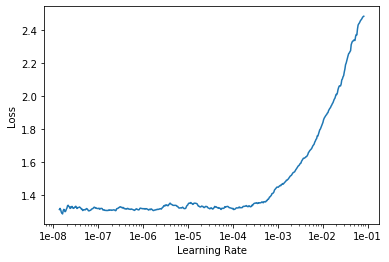

In [0]:
learn.load('stage-2')
learn.unfreeze()
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(1e-5, 8e-5))
learn.save('stage-3.3')

epoch,train_loss,valid_loss,error_rate,time
0,1.303707,1.183726,0.394625,05:40
1,1.180835,1.142704,0.382500,05:44
2,1.089154,1.119465,0.377000,05:44
3,0.994973,1.123123,0.375875,05:45


In [0]:
learn.save('stage-3')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


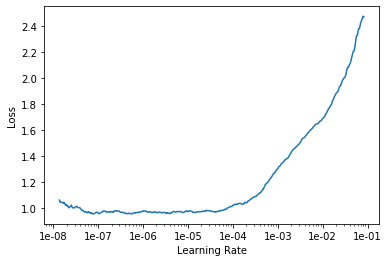

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=slice(6e-6, 2e-5))
learn.save('stage-4.1')

epoch,train_loss,valid_loss,error_rate,time
0,0.978336,1.126601,0.375875,05:33
1,0.972357,1.130036,0.376375,05:35
2,0.905277,1.130377,0.375500,05:34
3,0.867631,1.135947,0.374875,05:36


In [0]:
learn.load('stage-3')
learn.fit_one_cycle(3, max_lr=slice(5e-6, 5e-5))
learn.save('stage-4-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.969919,1.136435,0.374875,05:40
1,0.965232,1.125652,0.376125,05:46
2,0.875390,1.131961,0.375625,05:46


In [0]:
learn.load('stage-3')
learn.fit_one_cycle(3, max_lr=slice(5e-7, 5e-6))
learn.save('stage-4-3')

epoch,train_loss,valid_loss,error_rate,time
0,0.982843,1.120197,0.374875,05:44
1,0.977589,1.120303,0.373375,05:47
2,0.954110,1.121547,0.376750,05:49


In [0]:
learn.load('stage-4.1')
learn.unfreeze()
learn.save('stage-4')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


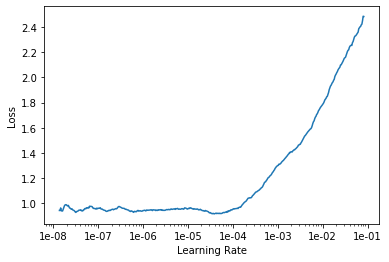

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=5e-5)
learn.save('stage-5-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.998293,0.935661,0.317000,04:37
1,1.011505,0.988253,0.334500,04:38
2,0.810504,0.950908,0.317625,04:38
3,0.659172,0.952257,0.316000,04:40


In [0]:
learn.save('stage-5')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


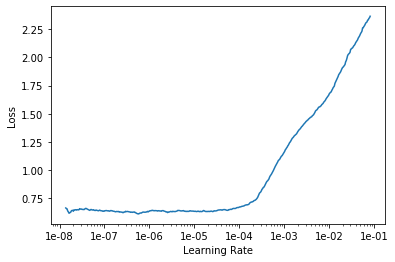

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(4, max_lr=1e-5)
learn.save('stage-6-1')

epoch,train_loss,valid_loss,error_rate,time


Missed training process of stage-6-1. It seems overfit.

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


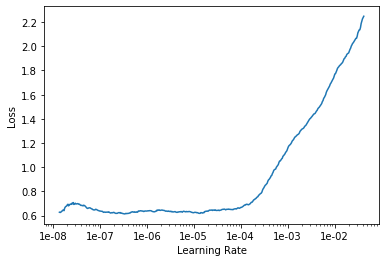

In [0]:
learn.load('stage-6')
learn.unfreeze()
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=1e-5)
learn.save('stage-7-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.636614,0.535346,0.171625,05:27
1,0.632851,0.533620,0.174875,05:25
2,0.538515,0.535918,0.172125,05:26


In [0]:
learn.save('stage-7')

## Add more data to train because of overfitting

In [0]:
learn = create_learner2(64, pretrained=False)

In [0]:
'''
bs = 64
transforms =  get_transforms(max_zoom=1.05, max_warp=0.05, max_rotate=5)
transforms[0][0] = crop_pad(row_pct=(0.4, 0.6), col_pct=(0.4, 0.6))
# tfs = (tfs[0][1:], tfs[1])
data = ImageDataBunch.from_df('data/data/selected_products', df, size=224, bs=bs, ds_tfms=transforms
                              ).normalize(imagenet_stats)

learn_root = my_drive_dir + '/Fashionnet'
learn = cnn_learner(data, models.resnet34, metrics=error_rate, path=learn_root, model_dir='Classifer_picked/', pretrained=False)
'''

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


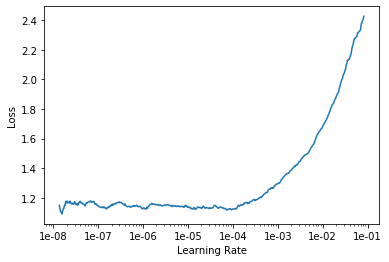

In [0]:
learn.load('stage-7')
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=7e-5)
learn.save('stage-8-1')

epoch,train_loss,valid_loss,error_rate,time
0,1.102573,1.060448,0.353410,18:45
1,0.959471,0.978737,0.322870,18:27


In [0]:
learn.save('stage-8')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


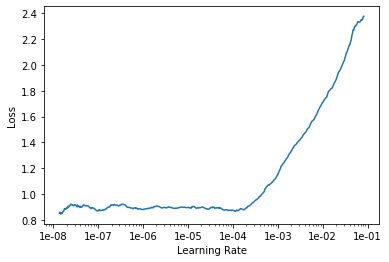

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=7e-5)
learn.save('stage-9-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.992081,1.075935,0.358285,18:04
1,0.933161,1.016158,0.336017,18:07
2,0.738249,1.013993,0.328336,18:11


In [0]:
learn.load('stage-8')
learn.fit_one_cycle(3, max_lr=2e-4)
learn.save('stage-9-2')
learn

epoch,train_loss,valid_loss,error_rate,time
0,1.149418,1.171170,0.392297,18:04
1,1.067819,1.046926,0.344547,18:12
2,0.898592,0.994586,0.324200,18:06


In [0]:
learn.load('stage-8')
learn.fit_one_cycle(2, max_lr=2e-4)
learn.save('stage-9-3')

epoch,train_loss,valid_loss,error_rate,time
0,1.152772,1.148298,0.381809,18:26
1,0.960734,1.002463,0.330330,18:16


In [0]:
learn.load('stage-9-2')
learn.unfreeze()
learn.save('stage-9')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


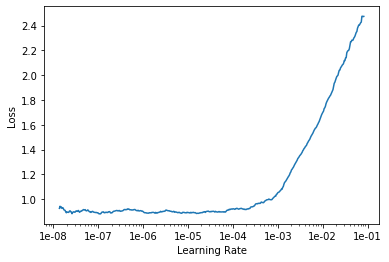

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-1, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=8e-5)
learn.save('stage-10-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.950915,0.905297,0.299568,16:42
1,0.901238,0.869547,0.286163,16:40
2,0.760026,0.862874,0.284464,16:48


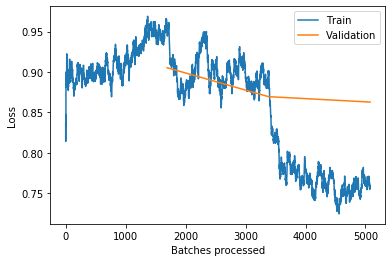

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage-10')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


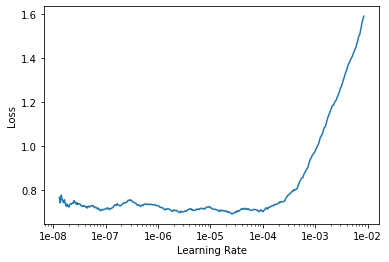

In [0]:
learn.lr_find(start_lr=1e-8, end_lr=1e-2, num_it=500)
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(3, max_lr=6e-5)
learn.save('stage-10-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.801561,0.901650,0.295284,15:22
1,0.720155,0.908209,0.295063,15:13
2,0.637266,0.913614,0.292884,15:09


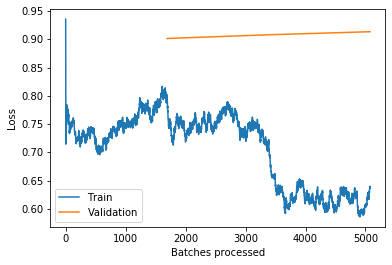

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.load('stage-9')
learn.fit_one_cycle(3, max_lr=1e-4)
learn.save('stage-10-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.989545,0.938965,0.313453,16:08
1,0.883649,0.892866,0.292551,15:20
2,0.736726,0.871092,0.284649,15:11


In [0]:
learn.load('stage-10-2')
learn.save('stage-10')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


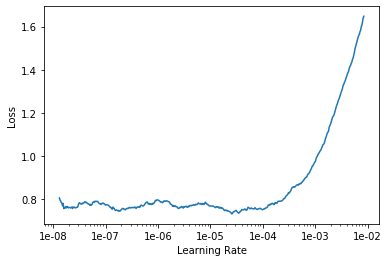

In [0]:
learn.unfreeze()
learn.lr_find(start_lr=1e-8, end_lr=1e-2, num_it=500)
learn.recorder.plot()

In [0]:
learn.load('stage-10')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=5e-5)
learn.save('stage-11-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.804504,0.743337,0.243140,23:56
1,0.803908,0.767189,0.253111,23:52
2,0.668204,0.754902,0.246242,23:49
3,0.582103,0.757309,0.246575,23:27


In [0]:
learn.load('stage-10')
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=8e-5)
learn.save('stage-11-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.839212,0.812794,0.268068,23:31
1,0.777274,0.794717,0.261716,23:44
2,0.633351,0.771653,0.254293,23:45


In [0]:
learn.load('stage-11-2')
learn.unfreeze()
learn.save('stage-11')

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


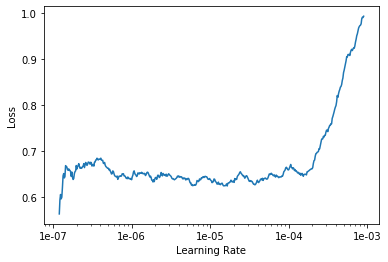

In [0]:
learn.lr_find(start_lr=1e-7, end_lr=1e-3, num_it=500)
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


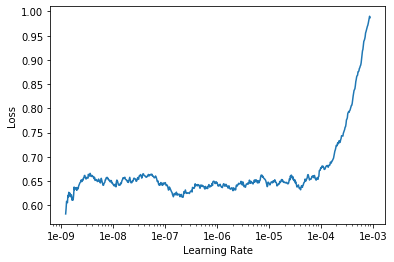

In [0]:
learn.lr_find(start_lr=1e-9, end_lr=1e-3, num_it=700)
learn.recorder.plot()

In [9]:
learn.load('stage-11')
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=1e-7)
learn.save('stage-12-1')

epoch,train_loss,valid_loss,error_rate,time
0,0.637948,0.573214,0.185974,22:13
1,0.628431,0.572630,0.185716,22:27
2,0.647847,0.572097,0.185605,22:34
3,0.641249,0.570784,0.185642,22:36


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


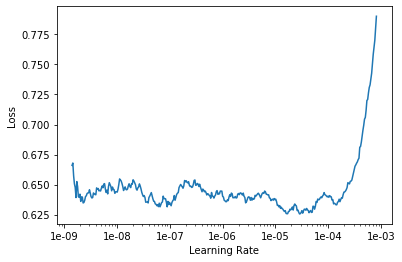

In [22]:
learn = create_learner2(128, pretrained=False)
learn.load('stage-11')
learn.unfreeze()
learn.lr_find(start_lr=1e-9, end_lr=1e-3, num_it=400)
learn.recorder.plot()

In [23]:
learn.fit_one_cycle(3, max_lr=2e-5)
learn.save('stage-12-2')

epoch,train_loss,valid_loss,error_rate,time
0,0.645457,0.578346,0.188855,21:53
1,0.607828,0.575816,0.188486,22:01
2,0.558409,0.572450,0.188079,22:04


epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


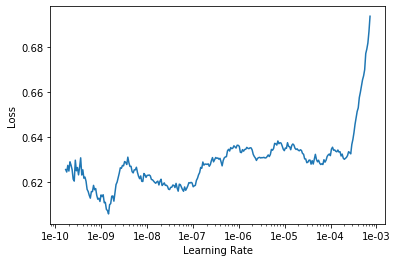

In [10]:
learn = create_learner2(256, pretrained=False)
learn.load('stage-11')
learn.unfreeze()
learn.lr_find(start_lr=1e-10, end_lr=1e-3, num_it=300)
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(3, max_lr=2e-9)
learn.save('stage-12-3')

epoch,train_loss,valid_loss,error_rate,time
0,0.633794,0.577569,0.188633,23:18
1,0.630498,0.577647,0.188116,22:49
2,0.619377,0.578022,0.189039,22:56


In [0]:
learn.load('stage-12-1')
learn.save('stage-12')